# Agrupamiento conocido: Jerárquico Aglomerativo

### Librerias

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree, dendrogram


### Carga de datos


In [11]:
#Carga de datos
np.random.seed(31) # Fijamos una semilla para asegurar la reproducibilidad de la práctica
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_cuatro_diferente_densidad.csv'
D = np.array(pd.read_csv(data_file_url,header=0))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:2]
# Valores de la clase
Dy = D[:,2]

### Descripción de los datos cargados

El dataset cargado tiene 1999 instancias.
 
Matriz original D:  [[ 51.72   5.     2.  ]
 [ 47.93   5.     2.  ]
 [220.39   7.     3.  ]
 ...
 [ 30.15   6.     2.  ]
 [ 49.9    6.     2.  ]
 [ 40.66   7.     2.  ]]
 
Matriz sin los valores de la clase:  [[ 51.72   5.  ]
 [ 47.93   5.  ]
 [220.39   7.  ]
 ...
 [ 30.15   6.  ]
 [ 49.9    6.  ]
 [ 40.66   7.  ]]
 
Matriz de los valores de la clase:  [2. 2. 3. ... 2. 2. 2.]


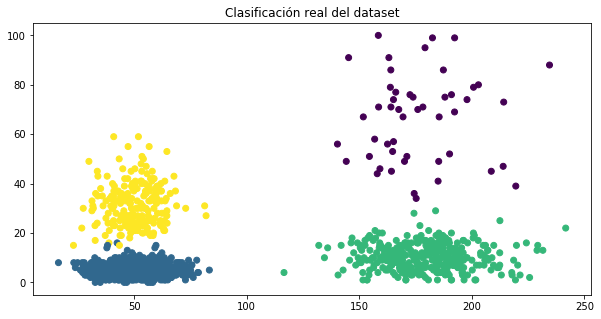

In [12]:
print('El dataset cargado tiene',Dy.size,'instancias.')
print(' ')
print ('Matriz original D: ', D)
print(' ')
print ('Matriz sin los valores de la clase: ', Dx)
print(' ')
print ('Matriz de los valores de la clase: ',  Dy)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)
ax.set_title('Clasificación real del dataset')
fig.text=''


### Funciones

In [14]:
def plot_varios(Dx,Dy,K):
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=Dy)
    ax[0].set_title('Datos originales')

    modelo = linkage(Dx, 'single')
    ax[1].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[1].set_title('Disimilitud mínima')
    
    modelo = linkage(Dx, 'complete')
    ax[2].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[2].set_title('Disimilitud máxima')
    
    modelo = linkage(Dx, 'average')
    ax[3].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[3].set_title('Disimilitud media')

### Ejecución del algoritmo y resultados

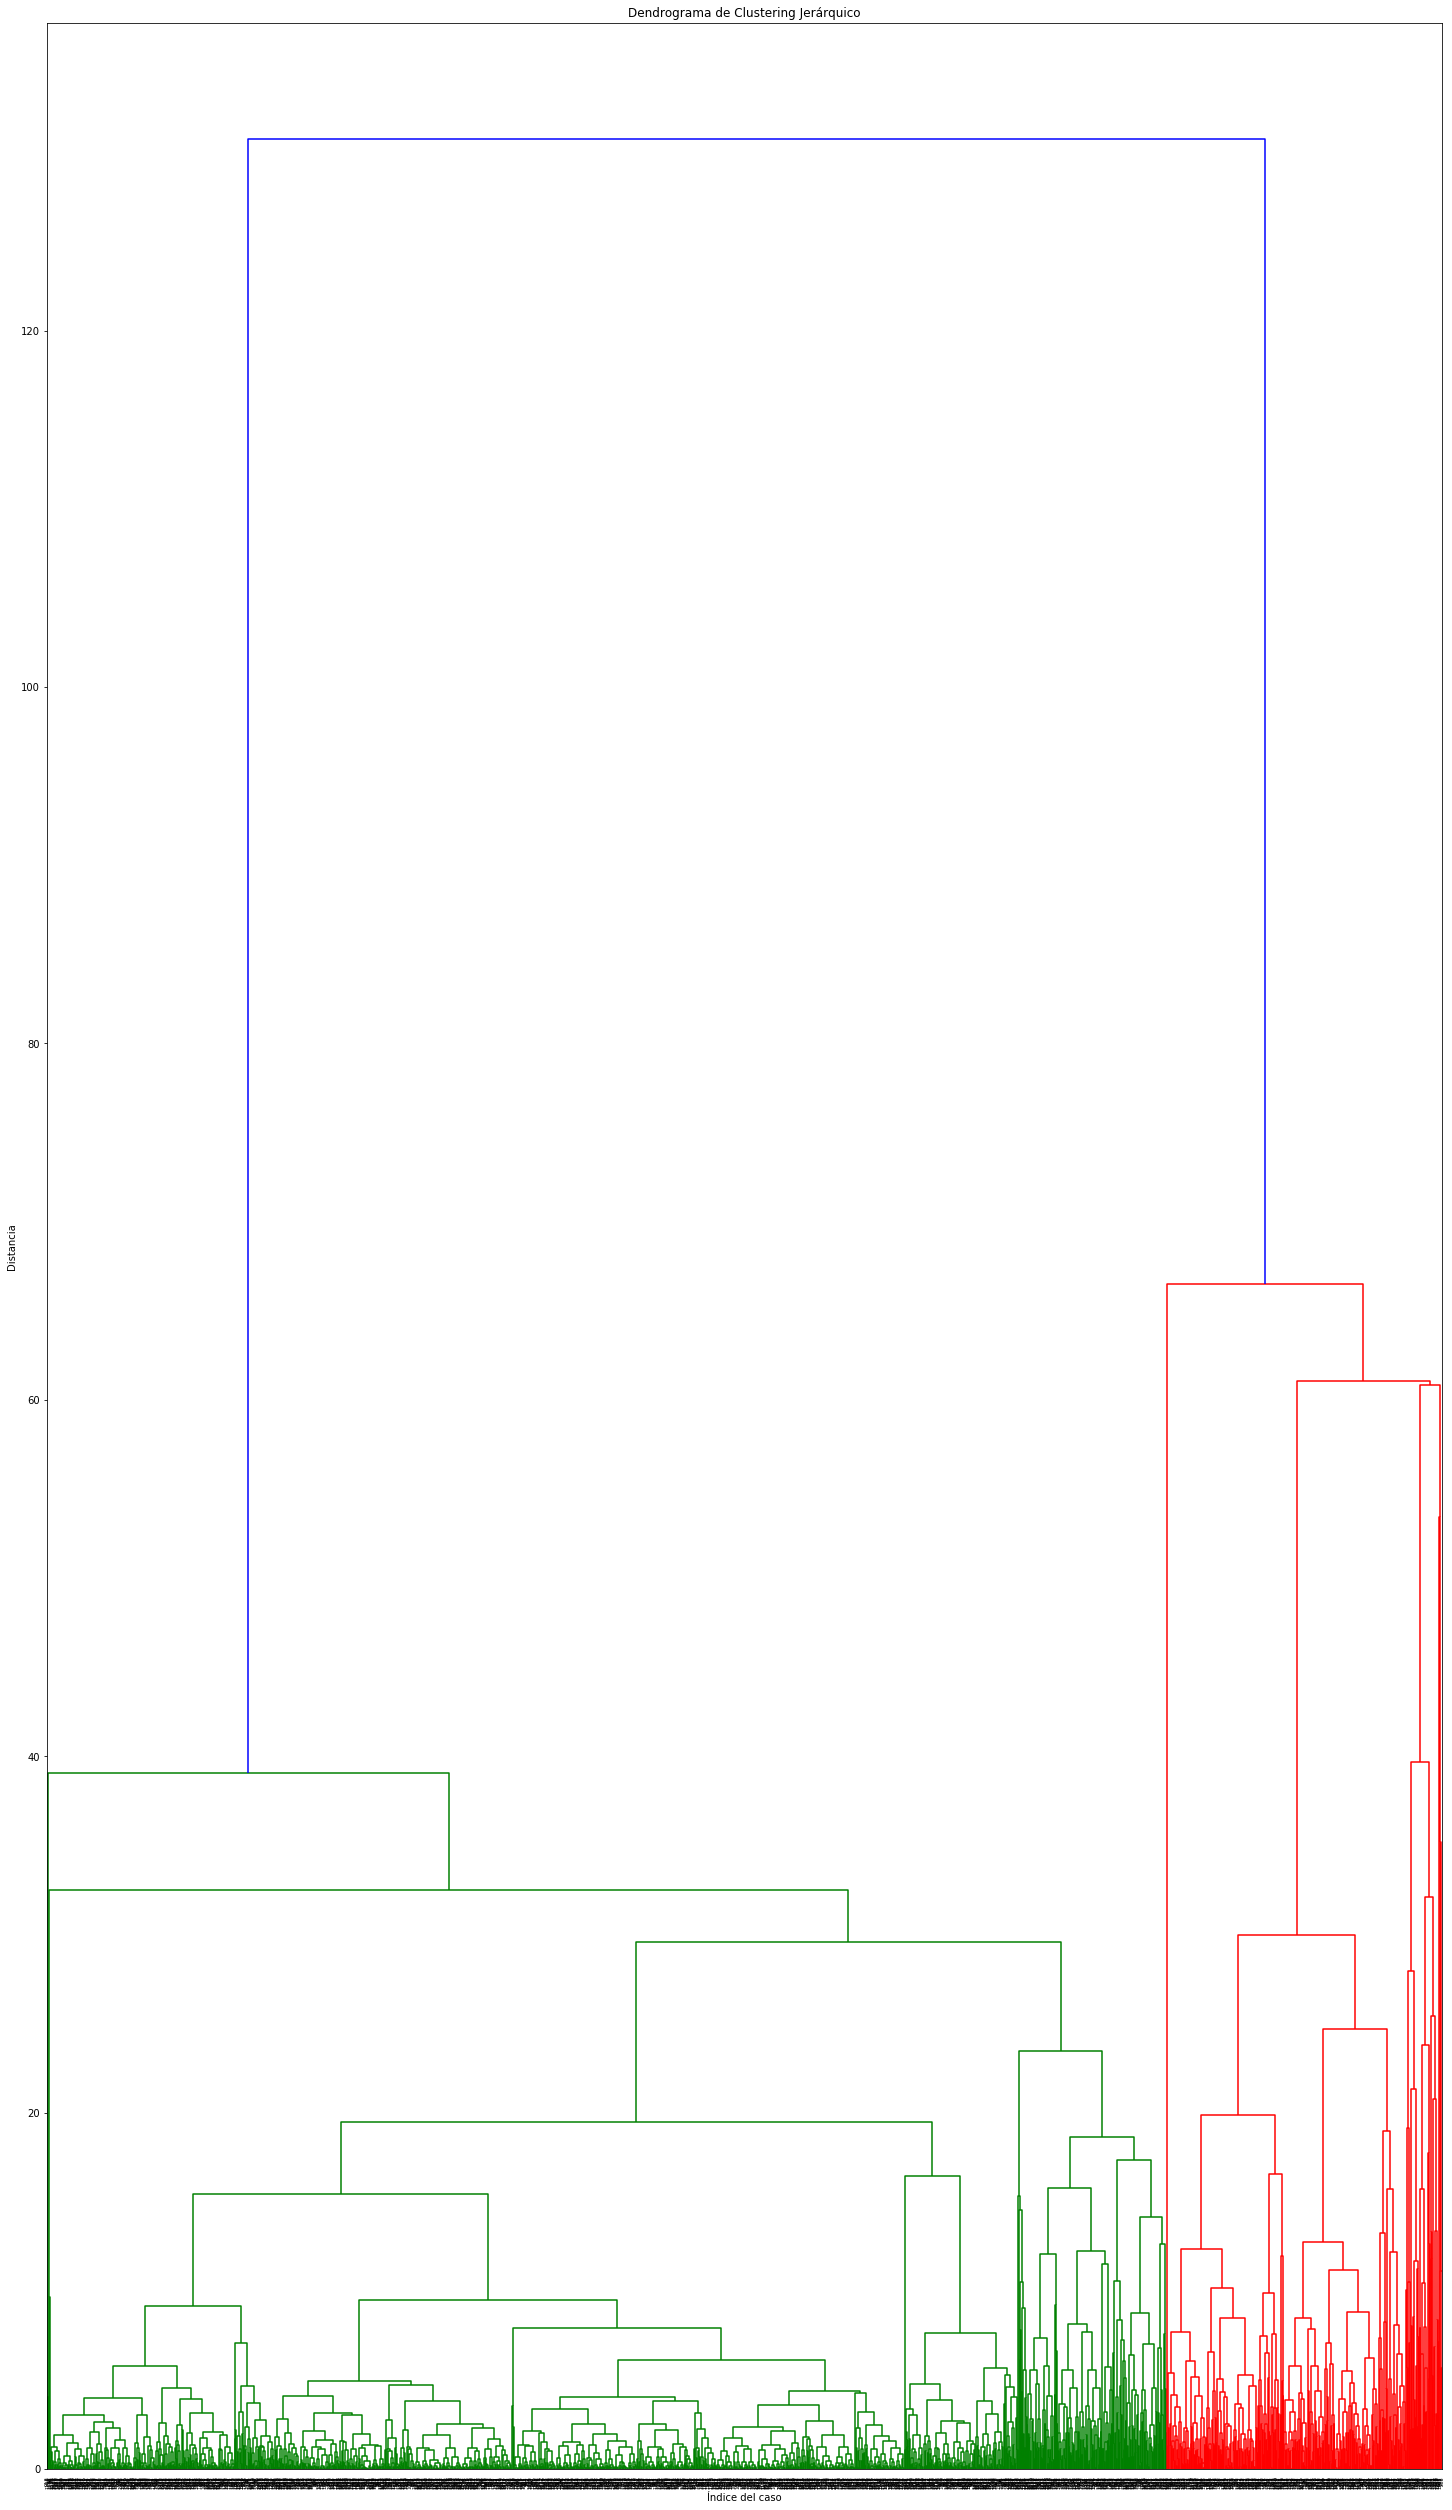

In [29]:
modelo = linkage(Dx, 'single')   # disimilitud mínima
modelo = linkage(Dx, 'complete') # disimilitud máxima
modelo = linkage(Dx, 'average')  # disimilitud media

plt.figure(figsize=(25, 45))
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice del caso')
plt.ylabel('Distancia')
dendrogram(modelo)
plt.show()

### Comparación de resultados estimados con valores reales

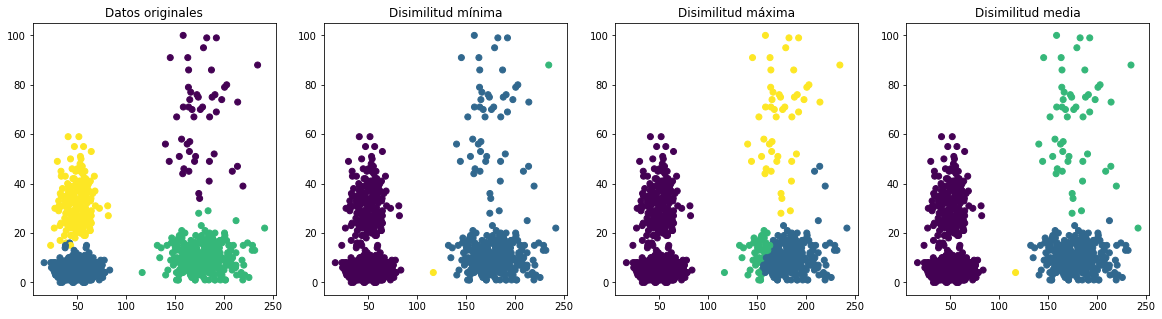

In [19]:
plot_varios(Dx,Dy,4)

### Métricas - ME QUEDO AQUIIIIII

In [30]:
from sklearn.metrics import silhouette_score,calinski_harabaz_score

K = 4
partToEval = mParticiones[:,K-1]
print (Dx)
print (partToEval)
print('La medida de Silueta con K =',K,'es',silhouette_score(Dx,partToEval))
print('La medida de Calinski Harabaz con K =',K,'es',calinski_harabaz_score(Dx, partToEval))      

rsilueta = np.zeros(mParticiones.shape[1])
rch = np.zeros(mParticiones.shape[1])
for K in np.arange(1,mParticiones.shape[1]-1):
    rsilueta[K] = silhouette_score(Dx, mParticiones[:,K])
    rch[K] = calinski_harabaz_score(Dx, mParticiones[:,K])

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(np.arange(1,mParticiones.shape[1]-1), rsilueta[np.arange(1,mParticiones.shape[1]-1)],
           linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot(np.arange(1,mParticiones.shape[1]-1), rch[np.arange(1,mParticiones.shape[1]-1)],
           linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de Calinski Harabaz")

NameError: name 'mParticiones' is not defined